<a href="https://colab.research.google.com/github/PRAVITH10/Random-Forest/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv("/content/collegiate_athlete_injury_dataset.csv")

In [82]:
df.shape

(200, 17)

In [83]:
df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [85]:
df.isnull().sum()

,0
Athlete_ID,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
Position,0
Training_Intensity,0
Training_Hours_Per_Week,0
Recovery_Days_Per_Week,0
Match_Count_Per_Week,0


In [86]:
df.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.170000,180.805000,77.475000,5.10500,11.315000,1.985000,2.385000,1.975000,4.920000,74.465000,72.630000,93.395000,46.470000,0.070000
std,2.002787,11.529598,12.440789,2.49904,4.438952,0.811212,1.154748,0.817137,2.560543,14.636939,14.432762,8.660485,18.943956,0.255787
min,18.000000,160.000000,55.000000,1.00000,5.000000,1.000000,1.000000,1.000000,1.000000,50.000000,50.000000,62.000000,2.000000,0.000000
25%,19.000000,171.000000,67.000000,3.00000,7.000000,1.000000,1.000000,1.000000,3.000000,62.000000,60.750000,89.000000,33.000000,0.000000
50%,21.000000,182.500000,77.500000,5.00000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,45.000000,0.000000
75%,23.000000,191.000000,89.000000,7.00000,15.000000,3.000000,3.000000,3.000000,7.000000,86.250000,85.000000,100.000000,60.000000,0.000000
max,24.000000,199.000000,99.000000,9.00000,19.000000,3.000000,4.000000,3.000000,9.000000,99.000000,99.000000,100.000000,100.000000,1.000000


In [87]:
df=df.drop('Athlete_ID',axis=1)

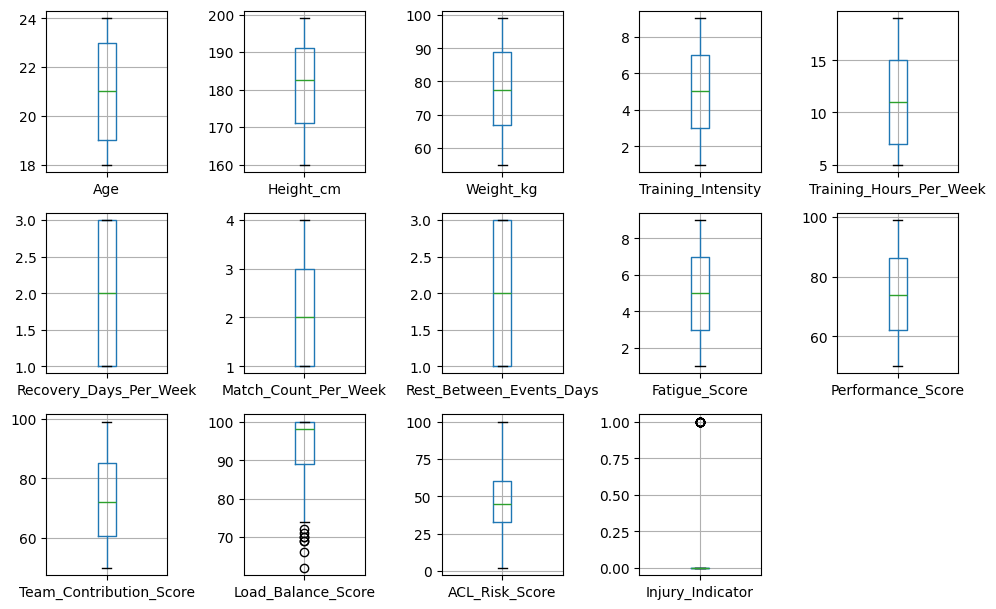

In [88]:
plt.figure(figsize=(10,10))
n_col=df.select_dtypes(include=['int64']).columns
for i,col in enumerate(n_col):
  plt.subplot(5,5,i+1)
  df.boxplot(col)
plt.tight_layout()
plt.show()

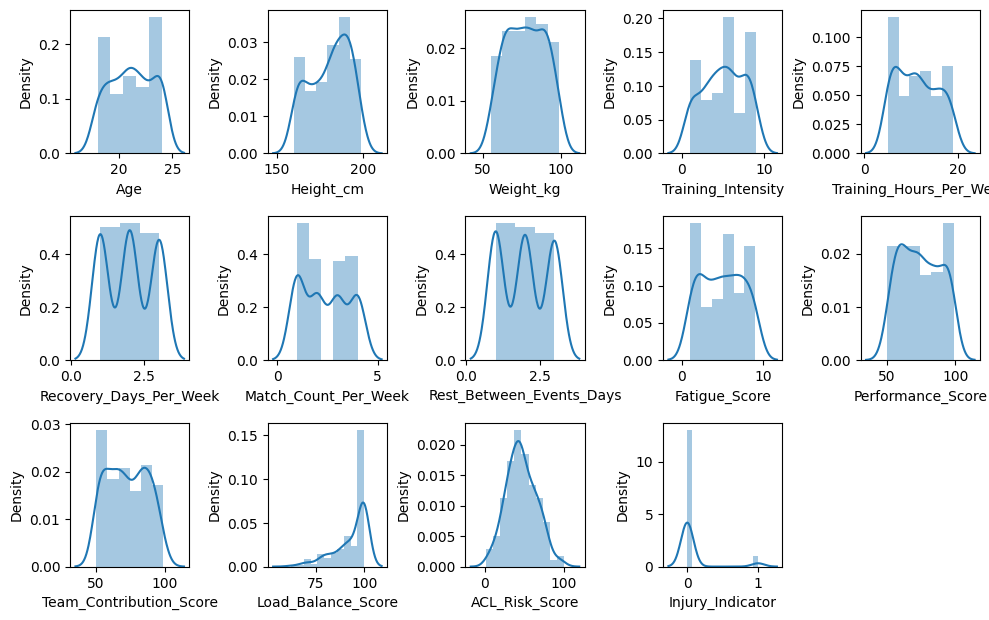

In [89]:
plt.figure(figsize=(10,10))
for i,col in enumerate(n_col):
  plt.subplot(5,5,i+1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()


In [90]:
def remove_outlier(df,col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lr=Q1-1.5*IQR
  ur=Q3+1.5*IQR
  df[col]=np.where(df[col]>ur,ur,df[col])
  df[col]=np.where(df[col]<lr,lr,df[col])

remove_outlier(df,'Load_Balance_Score')


<function matplotlib.pyplot.show(close=None, block=None)>

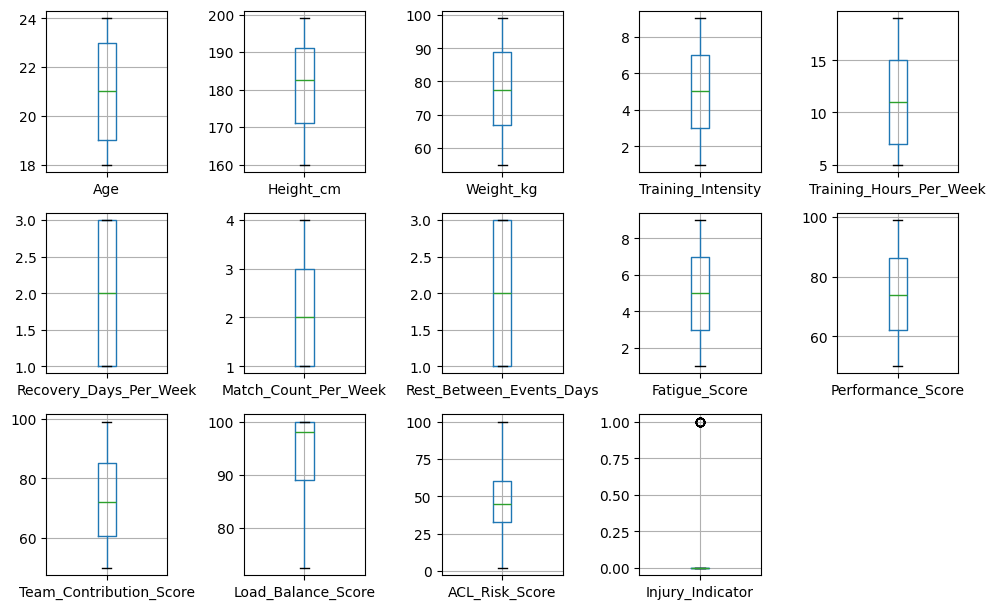

In [91]:
plt.figure(figsize=(10,10))
n_col=df.select_dtypes(include=['int64','float64']).columns
for i,col in enumerate(n_col):
  plt.subplot(5,5,i+1)
  df.boxplot(col)
plt.tight_layout()
plt.show

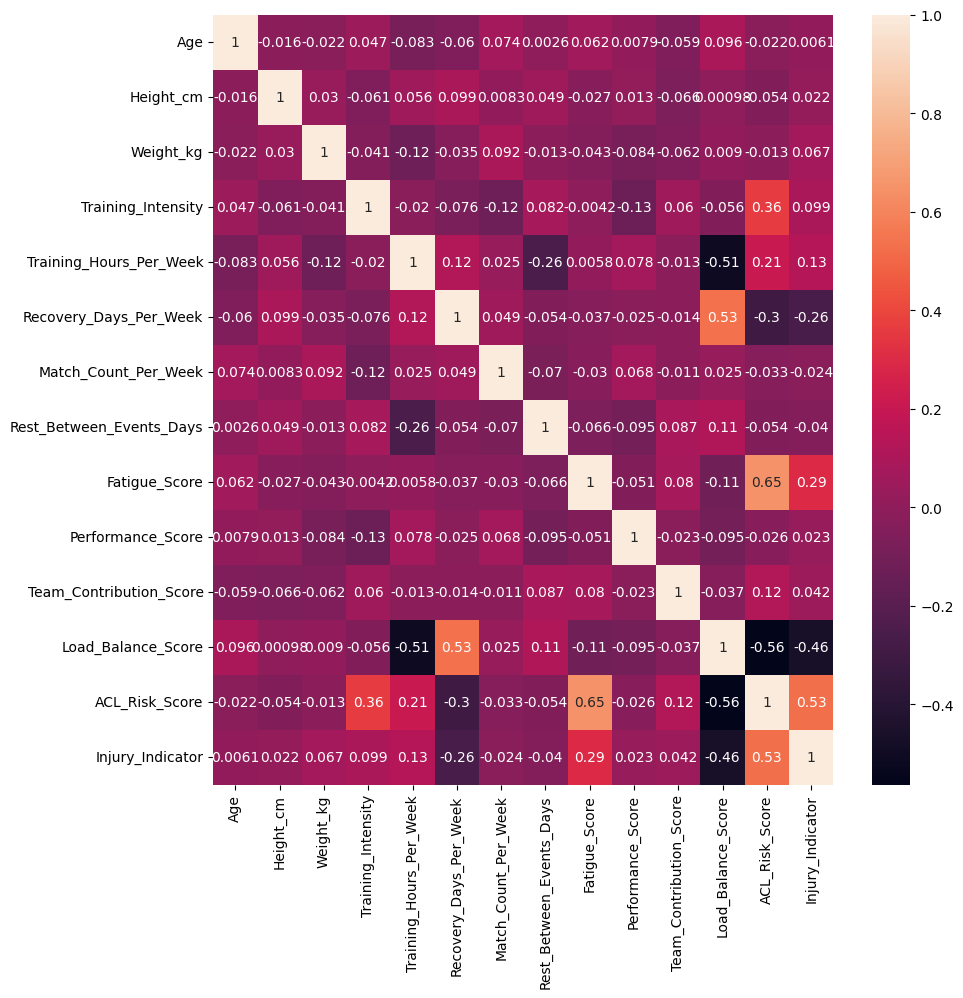

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(df[n_col].corr(),annot=True)
plt.show()

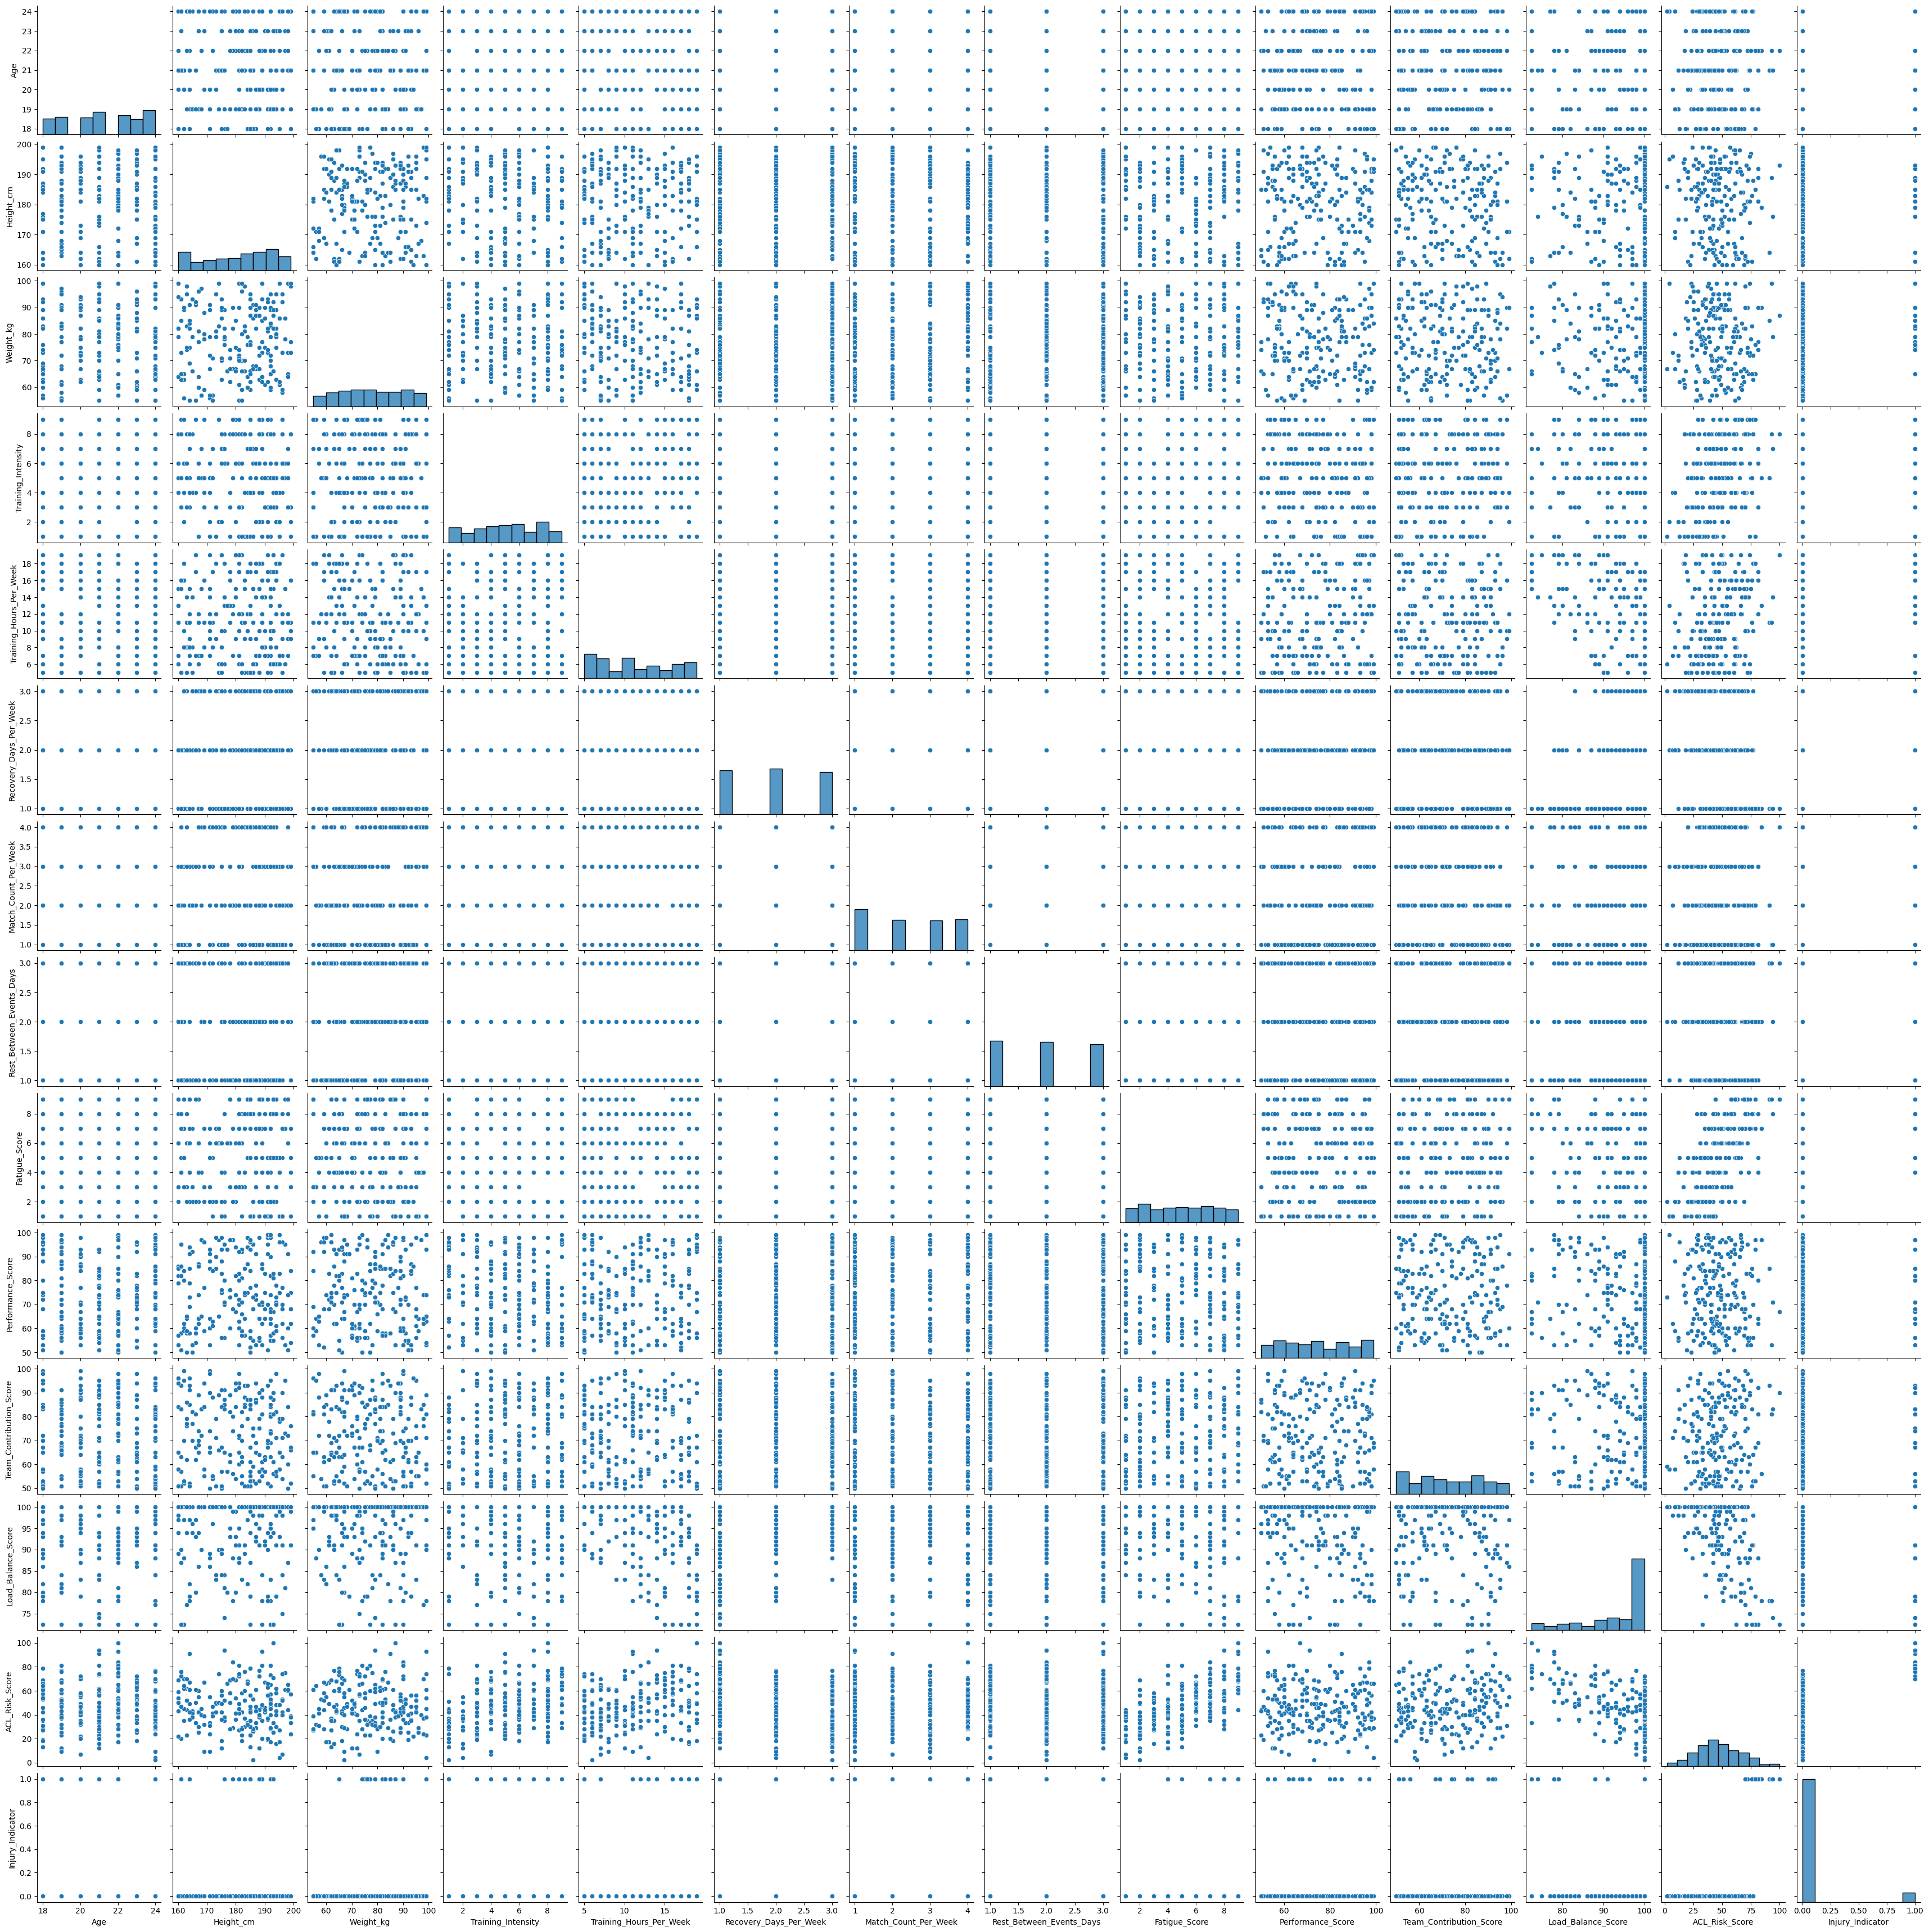

In [93]:
sns.pairplot(df)
plt.show()

Encoding catagorical values


In [94]:
c_col=df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for c in c_col:
  df[c]=le.fit_transform(df[c])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       200 non-null    int64  
 1   Gender                    200 non-null    int64  
 2   Height_cm                 200 non-null    int64  
 3   Weight_kg                 200 non-null    int64  
 4   Position                  200 non-null    int64  
 5   Training_Intensity        200 non-null    int64  
 6   Training_Hours_Per_Week   200 non-null    int64  
 7   Recovery_Days_Per_Week    200 non-null    int64  
 8   Match_Count_Per_Week      200 non-null    int64  
 9   Rest_Between_Events_Days  200 non-null    int64  
 10  Fatigue_Score             200 non-null    int64  
 11  Performance_Score         200 non-null    int64  
 12  Team_Contribution_Score   200 non-null    int64  
 13  Load_Balance_Score        200 non-null    float64
 14  ACL_Risk_S

In [95]:
x=df.drop('Injury_Indicator',axis=1)
y=df['Injury_Indicator']

In [96]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for col in x.columns:
  x[col]=ss.fit_transform(x[[col]])
df.head()

,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,24,0,195,99,0,2,13,2,3,1,1,99,58,100.0,4,0
1,21,1,192,65,1,8,14,1,3,1,4,55,63,83.0,73,0
2,22,1,163,83,2,8,8,2,1,3,6,58,62,100.0,62,0
3,24,0,192,90,2,1,13,1,1,1,7,82,74,78.0,51,0
4,20,0,173,79,0,3,9,1,2,1,2,90,51,83.0,49,0


In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [98]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(
    n_estimators=100,     #the number of trees
    max_depth=None,       #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2,  #The minimum sample required to split into node
    min_samples_leaf=1,   #Minimun no of samples required to be leaf
    random_state=0        #Control the randomness
)

In [99]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

the accuracy of the model is: 0.975


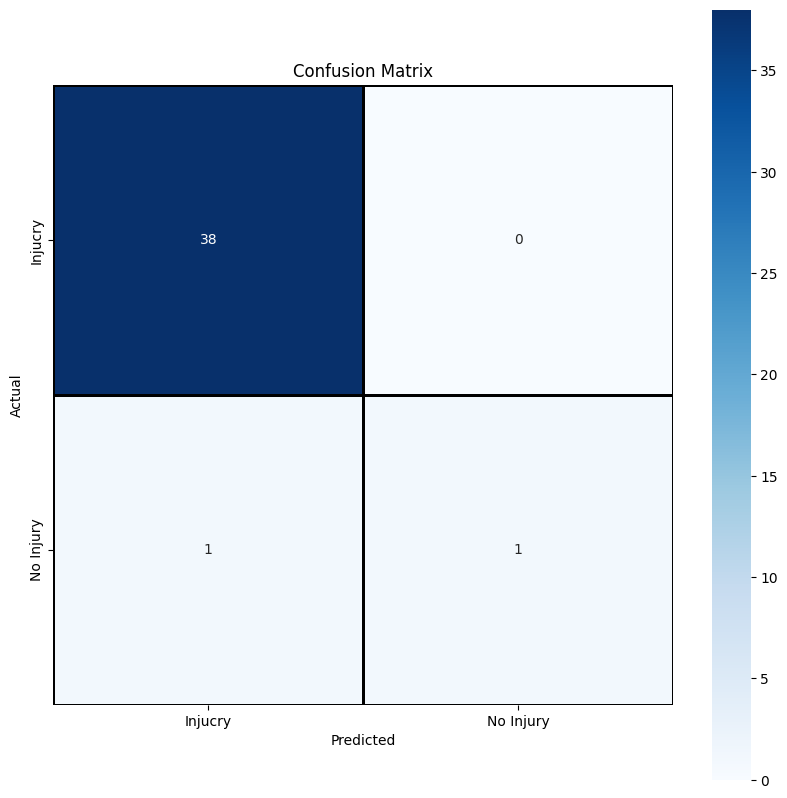

              precision    recall  f1-score   support

     Injucry       0.97      1.00      0.99        38
   No Injury       1.00      0.50      0.67         2

    accuracy                           0.97        40
   macro avg       0.99      0.75      0.83        40
weighted avg       0.98      0.97      0.97        40



In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(y_test,y_pred)
print(f"the accuracy of the model is:",accuracy_score(y_test,y_pred))
c_mat=confusion_matrix(y_test,y_pred)
class_name=['Injucry','No Injury']
plt.figure(figsize=(10,10))
sns.heatmap(c_mat,annot=True,fmt='d',cmap='Blues',xticklabels=class_name,yticklabels=class_name,linewidths=1,linecolor='black',square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test,y_pred,target_names=class_name))

In [101]:
tp=c_mat[0][0]
tn=c_mat[1][1]
fn=c_mat[0][1]
fp=c_mat[1][0]
print(f"True Positive:{tp}")
print(f"True Negative:{tn}")
print(f"False Positive:{fp}")
print(f"False Negative:{fn}")

True Positive:38
True Negative:1
False Positive:1
False Negative:0


In [102]:
print("senstivity:",tp/(tp+fn))
print("specificity:",tn/(tn+fp))
print("precision:",tp/(tp+fp))
print("negative prediuction values:",tn/(tn+fn))
print("accuracy:",tp+tn/(tp+tn+fp+fn))

senstivity: 1.0
specificity: 0.5
precision: 0.9743589743589743
negative prediuction values: 1.0
accuracy: 38.025


In [103]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],                # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Min samples at a leaf node
    'max_features': ['sqrt', 'log2', None],         # Number of features to consider at each split
    'class_weight': ['balanced', None]              # Weights associated with classes
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                        param_grid=param_grid,
                        cv=3,
                        n_jobs=-1,
                        verbose=1)
grid_search.fit(x_train, y_train)
# Get the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters found:  {'class_weight': None, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.9811320754716982


Train Accuracy with tuned model:  0.98125
Test Accuracy with tuned model:  0.975


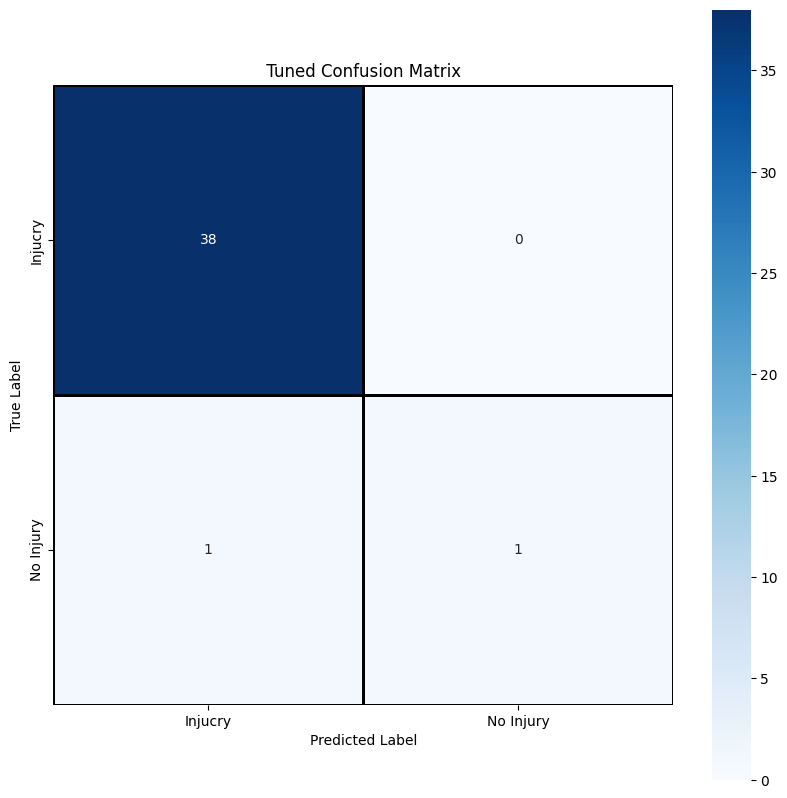

In [110]:
best_model = grid_search.best_estimator_
y_train_pred_tuned = best_model.predict(x_train)
y_test_pred_tuned = best_model.predict(x_test)
print("Train Accuracy with tuned model: ", accuracy_score(y_train, y_train_pred_tuned))
print("Test Accuracy with tuned model: ", accuracy_score(y_test, y_test_pred_tuned))

conf_matrix = confusion_matrix(y_test, y_test_pred_tuned)
class_names = ['Injury','No Injury']

plt.figure(figsize=(10,10))
sns.heatmap(c_mat,annot=True,fmt='d',cmap='Blues',xticklabels=class_name,yticklabels=class_name,linewidths=1,linecolor='black',square=True)
plt.title(' Tuned Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [105]:
#After tuning
tp=conf_matrix[0][0]
tn=conf_matrix[1][1]
fn=conf_matrix[0][1]
fp=conf_matrix[1][0]

print(f"True Positive:{tp}")
print(f"True Negative:{tn}")
print(f"False Positive:{fp}")
print(f"False Negative:{fn}")

print("senstivity:",tp/(tp+fn))
print("specificity:",tn/(tn+fp))
print("precision:",tp/(tp+fp))
print("negative prediuction values:",tn/(tn+fn))
print("accuracy:",tp+tn/(tp+tn+fp+fn))

True Positive:38
True Negative:1
False Positive:1
False Negative:0
senstivity: 1.0
specificity: 0.5
precision: 0.9743589743589743
negative prediuction values: 1.0
accuracy: 38.025
